<a href="https://colab.research.google.com/github/MamadouBousso/Pytorch_courses/blob/main/Cours1Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction à Pytorch

### Informations sur pytorch

importer pytorch

In [ ]:
import torch

Voir la version de pytorch

In [ ]:
print(torch.__version__)

1.11.0+cu113


Voir comment utiliser CUDA

In [ ]:
torch.cuda.is_available()

True

Voir le nombre de device avec device_count

In [ ]:
print(torch.cuda.device_count())

1


Afficher le device courant

In [ ]:
if torch.cuda.device_count()!=0:
  print(torch.cuda.get_device_name())
  print(torch.cuda.get_device_capability())

Tesla T4
(7, 5)


### Creation de tenseurs et changement de type

In [ ]:
# Par defaut le type de données est du torch.float32
A = torch.ones((3,4))
B = torch.zeros((2,2))

In [ ]:
print(A)
print(B)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0.],
        [0., 0.]])


In [ ]:
print(A.dtype)
print(B.dtype)

torch.float32
torch.float32


In [ ]:
# Preciser le type de données avec type
A.type(dtype = torch.int64)

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])

In [ ]:
print(B)

tensor([[0., 0.],
        [0., 0.]])


Changer le type de données du tenseur avec type

In [ ]:
B.type(dtype = torch.int8)

tensor([[0, 0],
        [0, 0]], dtype=torch.int8)

In [ ]:
B

tensor([[0., 0.],
        [0., 0.]])

Convertir les tenseurs en numpy array et vice-versa: utiliser la fonction numpy() pour les tenseurs et torch.from_numpy pour les tenseurs numpy

In [ ]:
import numpy as np

In [ ]:
y = np.zeros((4,5))

In [ ]:
y

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
# changer un tableau numpy en tenseur pytorch avec la fonction from_numpy()
x = torch.from_numpy(y)

In [ ]:
print(type(x))

<class 'torch.Tensor'>


In [ ]:
x

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=torch.float64)

In [ ]:
z = torch.rand((3,4))

In [ ]:
# changer un tenseur pytorh en tenseur numpy avec numpy()
l = z.numpy()

In [ ]:
print(type(l))

<class 'numpy.ndarray'>


In [ ]:
print(l)

[[0.8721621  0.4299175  0.9728926  0.6232012 ]
 [0.8771574  0.6674712  0.77887976 0.44208103]
 [0.11265922 0.5389579  0.19549018 0.9125539 ]]


Changer les tenseurs entre les devices: passer de CPU à GPU et vice-versa

In [ ]:
x = torch.rand((3,3))

In [ ]:
x.device

device(type='cpu')

In [ ]:
# Definir une device CUDA
device = None
if torch.cuda.is_available():
  devices = torch.device("cuda:0")
  print(devices.index)

0


In [ ]:
#Changer x de device avec x.to
x = x.to(devices)

In [ ]:
print(x.device)

cuda:0


In [ ]:
# Ramener vers CPU ou devices = torch.device("cpu")
devices  = torch.device("cpu")
x = x.to(devices)

In [ ]:
x.device

device(type='cpu')

#### Creation de dataset avec torchvision

In [ ]:
import torchvision
from torchvision import datasets

Importation des données de MNIST et telechargement des données de train

In [ ]:
path2data = './data'
mnist_train = datasets.MNIST(path2data,train = True,download = True) 

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Partage des données en données de train et label

In [ ]:
train_data,train_label = mnist_train.data,mnist_train.targets

Visualiser les dimensions des données

In [ ]:
print(train_data.shape)

torch.Size([60000, 28, 28])


In [ ]:
print(train_label.shape)

torch.Size([60000])


Importation des données de MNIST et telechargement des données de test

In [ ]:
path2data = './data'
mnist_test = datasets.MNIST(path2data,train = False,download = True) 

In [ ]:
test_data,test_label = mnist_test.data,mnist_test.targets

In [ ]:
print(test_data.shape)

torch.Size([10000, 28, 28])


In [ ]:
print(test_label.shape)

torch.Size([10000])


#### Visualisation des données avec matplotlib

Ajouter une dimension qui representera le canal des images donc on aura un nouveau shape de la forme BxCxHxW. On utilise la fonction unsqueeze

In [ ]:
def addDim(x_t,dim,dim_actuel = 3):
  # Ajouter une dimension à un tenseur pour qu'il devienne B*C*H*W
  if len(x_t.shape)==dim_actuel:
    x_t = x_t.unsqueeze(dim)
  
  return x_t

In [ ]:
train_data = addDim(train_data,1)

In [ ]:
print(train_data.shape)

torch.Size([60000, 1, 28, 28])


In [ ]:
import matplotlib.pyplot as plt
from torchvision import utils
%matplotlib inline

In [ ]:
def show(img):
  # Transformer le tenseur pytorch en numpy array
  img_np = img.numpy()
  # Changer le format des dimensions en H*W*C
  img_np_tr = np.transpose(img_np,(1,2,0))
  
  plt.imshow(img_np_tr,interpolation='nearest')

In [ ]:
# Creer une grille de 40 images, 8 images par rangée
x_grid = utils.make_grid(train_data[:40])

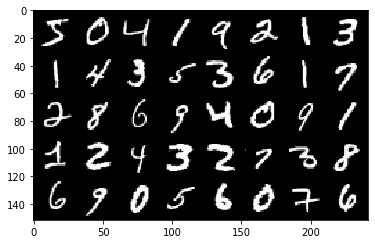

In [ ]:
show(x_grid)

In [ ]:
# Creer une grille de 40 images, 8 images par rangée
x_grid2 = utils.make_grid(train_data[4])

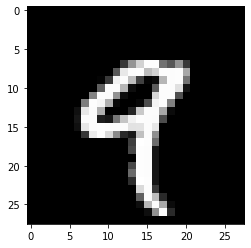

In [ ]:
show(x_grid2)

#### Transformation des données

On utilise le package torchvision.transforms

Creons un pipeline de transformation

In [ ]:
from torchvision import transforms

In [ ]:
trans = transforms.Compose([transforms.RandomHorizontalFlip(1),
                           transforms.RandomVerticalFlip(1),
                            
                           transforms.ToTensor()])

In [ ]:
path2data = './data'
mnist_train = datasets.MNIST(path2data,train = True,transform = trans,download = True) 

In [ ]:
train_data,train_label = mnist_train.data,mnist_train.targets

In [ ]:
# Visualisons un exemple d'images et sa transformé

from PIL import Image
from matplotlib import cm

img = train_data[0]
print(img.shape)


img_tr = trans(Image.fromarray(img.numpy()))


x_grid_new = utils.make_grid(torch.stack([img.unsqueeze(0),img_tr]),nrow=2,padding = 2)

torch.Size([28, 28])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


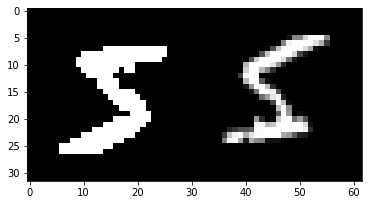

In [ ]:
show(x_grid_new)

Passons les transformation à l'ensemble des donnée. On redéfinit les ensmebles de train et de test

In [ ]:
path2data = './data'
mnist_test = datasets.MNIST(path2data,train = False,download = True) 

In [ ]:
test_data, test_label = mnist_test.data, mnist_test.targets

In [ ]:
print(train_data.shape)

torch.Size([60000, 28, 28])


In [ ]:
train_data = addDim(train_data,1)

In [ ]:
test_data = addDim(test_data,1)


In [ ]:
print(type(train_data))

<class 'torch.Tensor'>


#### Creation des batches

On utilise TensorDataset pour envelopper les jeux de données et les DataLoader pour les transformer en mini-batches de 10 images

In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
train_ds = TensorDataset(train_data,train_label)

In [ ]:
test_ds = TensorDataset(test_data,test_label)

Creation des batches

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_dl  = DataLoader(train_ds, 10)

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])


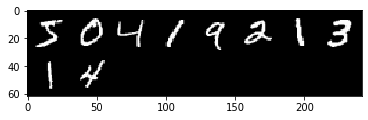

In [ ]:

for x,y in train_dl:

  x_grid = utils.make_grid(x)
  show(x_grid)
  print(y)
  
  break
  

#### Creation des modeles
On utilise la classe nn.Module
Une façon de définir des modèles dans PyTorch consiste à sous-classer la classe nn.Module. Dans cette méthode, nous spécifions les couches dans la méthode init de la classe. Il existe d'autre méthode mais celle-là offre une meilleure flexibilité pour créer des modèles personnalisés. Considérez un modèle multicouche, comme indiqué dans l'image suivante:

In [ ]:
from torch.nn import Module
class Modele(Module):
  def __init__(self):
    super(Modele,self).__init__()

  def forward(self):
    pass

  

### Classe autograd de pytorch

Une simple multiplication de tenseur

In [ ]:
import torch

In [ ]:
x = torch.tensor(2.0)
y = torch.tensor(1.0)

In [ ]:
print(x.requires_grad)

False


In [ ]:
print(x.grad)

None


In [ ]:
z = x*y

In [ ]:
print(type(z))

<class 'torch.Tensor'>


In [ ]:
print(z.requires_grad)

False


In [ ]:
print(z.grad_fn)

None


In [ ]:
x.requires_grad = True

In [ ]:
t = x*y

In [ ]:
print(t.requires_grad)

True


In [ ]:
t.backward(x)

In [ ]:
print(x.grad)

tensor(2.)


In [ ]:
# Displaying
for i, name in zip([x, y, t], "xyt"):
    print(f"{name}\ndata: {i.data}\nrequires_grad: {i.requires_grad}\n\
grad: {i.grad}\ngrad_fn: {i.grad_fn}\nis_leaf: {i.is_leaf}\n")

x
data: 2.0
requires_grad: True
grad: 2.0
grad_fn: None
is_leaf: True

y
data: 1.0
requires_grad: False
grad: None
grad_fn: None
is_leaf: True

t
data: 2.0
requires_grad: True
grad: None
grad_fn: <MulBackward0 object at 0x7fcf397cec10>
is_leaf: False



/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:475.)
  return self._grad


In [ ]:
z.requires_grad = True

In [ ]:
t = t + z

In [ ]:
print(f"{z}\ndata: {z.data}\nrequires_grad: {z.requires_grad}\n\
grad: {z.grad}\ngrad_fn: {z.grad_fn}\nis_leaf: {z.is_leaf}\n")

2.0
data: 2.0
requires_grad: True
grad: None
grad_fn: None
is_leaf: True



In [ ]:
print(f"{t}\ndata: {t.data}\nrequires_grad: {t.requires_grad}\n\
grad: {t.grad}\ngrad_fn: {t.grad_fn}\nis_leaf: {t.is_leaf}\n")

6.0
data: 6.0
requires_grad: True
grad: None
grad_fn: <AddBackward0 object at 0x7fcf39775dd0>
is_leaf: False



/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:475.)
  return self._grad


In [ ]:
t.backward(z)

In [ ]:
print(f"{z}\ndata: {z.data}\nrequires_grad: {z.requires_grad}\n\
grad: {z.grad}\ngrad_fn: {z.grad_fn}\nis_leaf: {z.is_leaf}\n")

2.0
data: 2.0
requires_grad: True
grad: 2.0
grad_fn: None
is_leaf: True



In [ ]:
import torch

In [ ]:
a = torch.tensor(3.0)
a.requires_grad = True
b = torch.tensor(5.0)
b.requires_grad = True
c = torch.tensor(2.0)

In [ ]:
print(a.requires_grad)

True


In [ ]:
u = b*c

In [ ]:
v = a+u

In [ ]:
v.retain_grad = True

In [ ]:
j = 3*v

In [ ]:
print(j.requires_grad)

True


In [ ]:
j.backward()

In [ ]:
print(a.grad)

tensor(3.)


In [ ]:
print(b.grad)

tensor(6.)


In [ ]:
print(c.grad)

None


In [ ]:
import numpy as np

In [ ]:
m = torch.tensor([0.0, 2.0, 8.0], requires_grad = True)

n = torch.tensor([5.0 , 1.0 , 7.0], requires_grad = True)

In [ ]:
g = m*n

In [ ]:
g.backward(torch.FloatTensor([1.0,1.0,1.0]))

In [ ]:
print(n.grad)

tensor([0., 2., 8.])


In [ ]:
t = 1/(1 + torch.exp(-n))

In [ ]:
print(type(t))

<class 'torch.Tensor'>


In [ ]:
t.requires_grad

True

In [ ]:
t.backward(torch.FloatTensor([1.0,1.0,1.0]))

In [ ]:
print(n.grad)

tensor([6.6481e-03, 2.1966e+00, 8.0009e+00])
